In [1]:
import os
os.chdir('../../')
print(os.getcwd())

import joblib
import pandas as pd
from tensorflow.keras.models import load_model
import numpy as np
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt

c:\Users\Joe\Desktop\Term-2\Data_Science\DS_CW_2


In [2]:
## Load the models
log_reg = joblib.load('outputs/models/log_reg.pkl')
nn_num = load_model('outputs/models/nn_numeric_input.h5')

## Load the test data
df_test = pd.read_csv('data/clean/clean_data_test.csv', index_col=False)

In [3]:
## Prepare the test data
numerical_features = ['team1_Ranking', 'team2_Ranking']
for i in range(10):
    numerical_features.append(f'player{i}_rating')
    numerical_features.append(f'player{i}_kd')


X_test = df_test[numerical_features]
y_test = df_test['team_1_won']

In [4]:
## Get the prediction probabilities for entries in the test data
log_reg_preds = log_reg.predict_proba(X_test)[:,1]
nn_preds = nn_num.predict(X_test)
nn_probs = (np.exp(nn_preds)/(1+np.exp(nn_preds))).squeeze()

2/2 [==============================] - 1s 3ms/step


In [7]:
weights = np.linspace(0, 1, 1001) ## Create grid of weights

Accuracies = []
CrossEntropyScores = []

### For the weights calculate the weighted probabilities and thus calculate the accuracies and cross entropy scores 
for w in weights:
    probs = w*log_reg_preds + (1-w)*nn_probs

    Accuracies.append(np.mean((probs>0.5) == y_test))
    CrossEntropyScores.append(log_loss(y_test, probs))


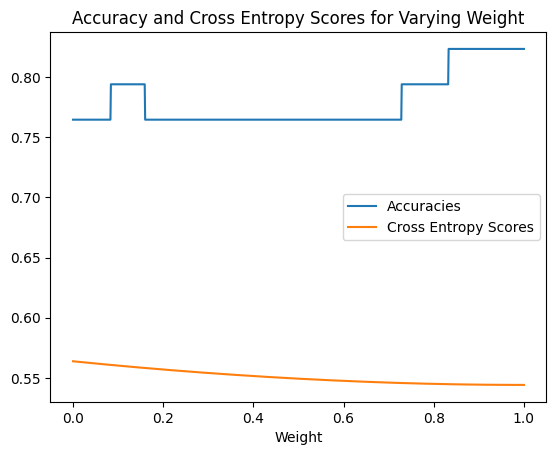

In [6]:
### Plot the accuracies and Cross entropys cores
plt.plot(weights, Accuracies, label = 'Accuracies')
plt.plot(weights, CrossEntropyScores, label = 'Cross Entropy Scores')
plt.title('Accuracy and Cross Entropy Scores for Varying Weight')
plt.xlabel('Weight')
plt.legend()

We see that our Accuracies appear to be highest for weights larger than 8.33, and our Cross Entropy scores are decreasing and plateau towards 1. We will use a weight value of 0.9 in our prediction.